In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [ ]:
!unzip -q "/content/drive/Shareddrives/602Project/Assigns/dataset.zip"

In [ ]:
len(os.listdir("/content/1_movies_per_genre")), len(os.listdir("/content/2_reviews_per_movie_raw"))

(17, 1150)

In [ ]:
movies_path = "/content/1_movies_per_genre"
reviews_path = "/content/2_reviews_per_movie_raw"

In [ ]:
movies_df = pd.DataFrame()

for fn in os.listdir(movies_path):
  if fn.endswith("csv"):
    temp_df = pd.read_csv(os.path.join(movies_path, fn))
    movies_df = movies_df.append(temp_df)

movies_df = movies_df.drop_duplicates(subset=['name', 'year'])
movies_df.shape, movies_df.columns

((1150, 10),
 Index(['name', 'year', 'movie_rated', 'run_length', 'genres', 'release_date',
        'rating', 'num_raters', 'num_reviews', 'review_url'],
       dtype='object'))

In [ ]:
rev_df = pd.DataFrame()

for fn in os.listdir(reviews_path):
  if fn.endswith("csv"):
    temp_df = pd.read_csv(os.path.join(reviews_path, fn))
    temp_df['year'] = int(fn.split(" ")[-1].replace(".csv", ""))
    temp_df['name'] = " ".join(fn.split(" ")[:-1])
    rev_df = rev_df.append(temp_df)

rev_df = rev_df.drop_duplicates(subset=['name', 'username', 'rating'])
rev_df['year'] = rev_df['year'].astype(int)
rev_df.shape, rev_df.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


((927096, 9),
 Index(['username', 'rating', 'helpful', 'total', 'date', 'title', 'review',
        'year', 'name'],
       dtype='object'))

In [ ]:
movies_df.to_csv("/content/drive/Shareddrives/602Project/Assigns/imdb_movies_raw.csv.gz", index=False, compression='gzip')
rev_df.to_csv("/content/drive/Shareddrives/602Project/Assigns/imdb_reviews_raw.csv.gz", index=False, compression='gzip')

### Joining Movies & Reviews data

In [ ]:
mrdf = rev_df.merge(movies_df, on=['name', 'year'], how="left")
mrdf = mrdf.rename(columns={'rating_y':'movie_rating', 'rating_x': 'rev_rating'})
mrdf.shape

(927096, 17)

In [ ]:
# mrdf.to_csv("/content/drive/Shareddrives/602Project/Assigns/imdb_data_merged.csv.gz", index=False, compression='gzip')

# Data Analysis

### NULL Values 

- There are no explict null values in any of the columns

In [ ]:
mrdf.isna().sum()

username        0
rev_rating      0
helpful         0
total           0
date            0
title           0
review          0
year            0
name            0
movie_rated     0
run_length      0
genres          0
release_date    0
movie_rating    0
num_raters      0
num_reviews     0
review_url      0
dtype: int64

In [ ]:
mrdf['rev_rating'].value_counts()

10      232450
9       125638
8       122243
Null     95361
7        87173
1        67868
6        58451
5        44559
4        33155
3        32334
2        27864
Name: rev_rating, dtype: int64

- Around 95K didnt have any rating associated with the given review

In [ ]:
mrdf['rev_len'] = mrdf['review'].str.len()
mrdf['rev_len'].mean(), mrdf['rev_len'].median()

(1317.6321589134243, 933.0)

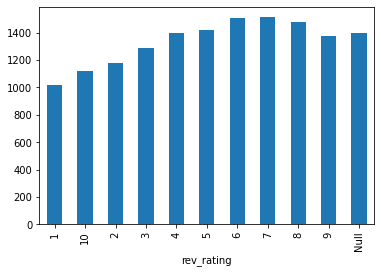

In [ ]:
mrdf.groupby(['rev_rating'])['rev_len'].mean().plot(kind="bar")

In [ ]:
mrdf['rev_len'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

0.05     145.0
0.10     258.0
0.25     607.0
0.50     933.0
0.75    1676.0
0.90    2885.0
0.95    3860.0
Name: rev_len, dtype: float64

Text(0.5, 1.0, 'Distrubution of Reviews Length (characters)')

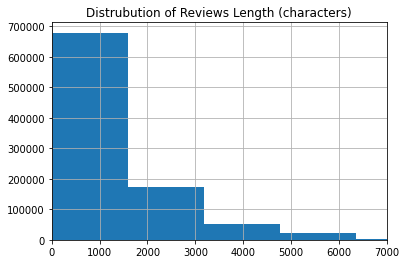

In [ ]:
ax = mrdf['rev_len'].hist()
_ = ax.axis(xmin=0, xmax=7000)
ax.set_title("Distrubution of Reviews Length (characters)")

Text(0.5, 1.0, 'Distrubution of Reviews word counts')

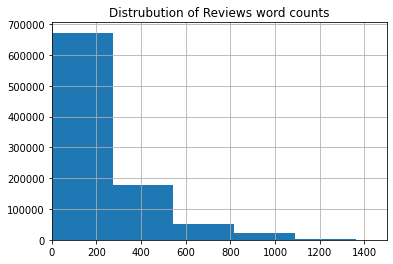

In [ ]:
mrdf['word_count'] = mrdf['review'].astype(str).apply(lambda x:len(x.split()))
ax = mrdf['word_count'].hist()
_ = ax.axis(xmin=0, xmax=1500)
ax.set_title("Distrubution of Reviews word counts")

The reviews are of good mix with both short and large ones. The length of reviews varies in a large range - from 1 character to more than 7k characters. Most reviews are having under 300-400 words

Text(0.5, 1.0, 'Distrubution of individual ratings of all movies')

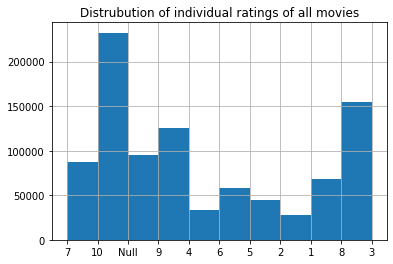

In [ ]:
ax = mrdf['rev_rating'].hist()
ax.set_title("Distrubution of individual ratings of all movies")

- Reviews with 10 star are comparatively very high. Also, reviews with less than 5 star are significantly low in number. This indicates most people have given rating greater than 5 - indicating data is having movies that are well recieved.

Text(0.5, 1.0, 'Distrubution of Average Movie Rating')

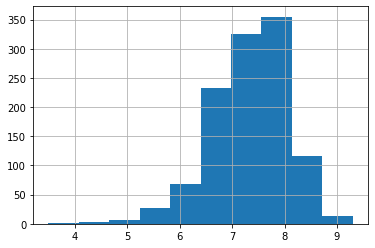

In [ ]:
movies_df['rating'].hist()
ax.set_title("Distrubution of Average Movie Rating")

- Confirming our previous hypothesis, Most movie are having the average rating greather than 7

Text(0.5, 1.0, 'Distrubution of release year of all Movies')

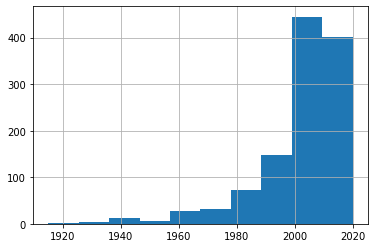

In [ ]:
movies_df['year'].hist()
ax.set_title("Distrubution of release year of all Movies")

- Majority of the movies are released after the year 2000

In [ ]:
# mrdf['run_length']
# mrdf['genres']

#### Notebook 2: Text Data Preprocessing & Analysis, Data Sampling/Splitting
